$\DeclareMathOperator{\sign}{sgn}$
$\newcommand{\CO}{\textbf{\rm conv}}$
$\newcommand{\RR}{{\mathcal R}}$
$\newcommand{\RE}{\mathbb{R}}$
$\newcommand{\TR}{\text{T}}$
$\newcommand{\beq}{\begin{equation}}$
$\newcommand{\eeq}{\end{equation}}$
$\newcommand{\bmat}{\left[\begin{array}}$
$\newcommand{\emat}{\end{array}\right]}$
$\newcommand{\bsmat}{\left[\begin{smallmatrix}}$
$\newcommand{\esmat}{\end{smallmatrix}\right]}$
$\newcommand{\barr}{\begin{array}}$
$\newcommand{\earr}{\end{array}}$
$\newcommand{\bsm}{\begin{smallmatrix}}$
$\newcommand{\esm}{\end{smallmatrix}}$

# Convex Optimization: A Practical Guide

Behzad Samadi

http://www.mechatronics3d.com/

April 23, 2020

## Introduction

Optimization problems happen in many fields including engineering, economics and medicine.
The objective of many engineering problems is to design "the best" product.
"The best" needs a formal definition that is not subject to personal judgement as much as possible. In a mathematical optimization, the objective function defines "the best". The objective function can be the description of a cost function we want to minimize or it can be a quantified description of the product's fitness, which is required to be maximized.
We live in a real world with lots of constraints. The energy is not free. The time we can spend to design the product is limited. The computation power we have is limited. The size, weight and price of the product is limited. Therefore, the optimization problems are usually defined as minimizing or maximizing an objective function considering a set of constraints. In this text, we focus on a certain class of optimization problems: convex optimization. The main importance of convex optimization problems is that there is no locally optimum point. If a given point is locally optimal then it is globally optimal. In addition, there exist effective numerical methods to solve convex optimization problems. In addition, it is possible to convert many nonconvex optimization problems to convex problems by changing the variables or introducing new variables. In this text, we will review what convex sets, functions and optimization problems are. Also, we show you numerical examples and applications of convex optimization in control systems. Also, there are many examples with the corresponding code in Python to help the reader understand how the problems are solved in practive. The Python code is based on [cvxpy](https://github.com/cvxgrp/cvxpy).

In the following, the definitions are taken from [1] unless otherwise stated. The reader is referred to the [Convex Optimization book by
Stephen Boyd and Lieven Vandenberghe](http://www.stanford.edu/~boyd/cvxbook/) for a detailed review of the theory of convex optimization and applications.

## Convex Sets

*Definition. Convex combination:* Given $m$ points in $\RR^n$ denoted by $x_i$ for $i=1,\ldots,m$, $x$ is a convex combination of the $m$ points if it can be written as:
\begin{equation}
x = \sum_{i=1}^m \lambda_ix_i
\end{equation}
where $\lambda_i\geq 0$ and
\begin{equation}
\sum_{i=1}^m\lambda_i=1
\end{equation}

*Definition. Convex set:* A set $C\subseteq\RR^n$ is convex if the convex combination of any two points in $C$ belongs to $C$.

*Definition. Convex hull:* The convex hull of a set $S$, denoted by $\text{conv}(S)$, is the set of all convex combinations of points in $S$.

*Definition. Affine combination:* $x$ is an affine combination of $x_1$ and $x_2$ if it can be written as:
\begin{equation}
x=\lambda_1x_1+\lambda_2x_2
\end{equation}

*Definition. Affine set:* A set $C\subseteq\RR^n$ is affine if the affine combination of any two points in $C$ belongs to $C$.

*Definition. Cone (nonnegative) combination:* Cone combination of two points $x_1$ and $x_2$ is a point $x$ that can be written as:
\begin{equation}
x=\theta_1x_1+\theta_2x_2
\end{equation}
with $\theta_1\geq 0$ and $\theta_2\geq 0$.

*Definition. Convex cone:* A set $S$ is a convex cone, if it contains all convex combinations of points in the set.

*Definition. Hyperplane:* A hyperplane is a set of the form $\{x|a^\text{T}x=b\}$ with $a\neq 0$. 

*Definition. Halfspace:* A halfspace is a set of the form $\{x|a^\text{T}x\leq b\}$ with $a\neq 0$.

*Definition. Polyhedron:* A polyhedron is the intersection of finite number of hyperplanes and halfspaces. A polyhedron can be written as:
\begin{equation}
\mathcal{P}=\{x| Ax \preceq b, Cx=d \}
\end{equation}
where $\preceq$ denotes componentwise inequality.

*Definition. Euclidean ball:* A ball with center $x_c$ and radius $r$ is defined as:
\begin{equation}
B(x_c,r)=\{x| \|x-x_c\|_2\leq r\}=\{x| x=x_c+ru, \|u\|_2\leq r\}
\end{equation}

*Definition. Ellipsoid:* An ellipsoid is defined as:
\begin{equation}
\{x | (x-x_c)^\text{T}P^{-1}(x-x_c)\leq 1\}
\end{equation}
where $P$ is a positive definite matrix. It can also be defined as:
\begin{equation}
\{x| x=x_c+Au, \|u\|_2\leq r\}
\end{equation}

### Generalized inequalities

*Definition. Proper code:* A cone is proper if it is closed (contains its boundary), solid (has nonempty interior) and pointed (contains no lines).

The nonnegative orthant of $\mathbb{R}^n$, $\{x|x\in\mathbb{R}^n,x_i\geq 0, i=1,\ldots,n \}$ is a proper cone. Also the cone of positive semidefinite matrices in $\mathbb{R}^{n\times n}$ is a proper cone.

*Definition. Generalized inequality:* A generalized inequality is defined by a proper cone $K$:
\begin{equation}
x\preceq_K y \Leftrightarrow y-x\in K
\end{equation}
\begin{equation}
x\prec_K y \Leftrightarrow y-x\in \text{interior}(K)
\end{equation}

In this context, we deal with the following inequalities:

- The inequality on real numbers is defined based on the proper cone of nonnegative real numbers $K=\mathbb{R}_+$.
- The componentwise inequality on real vectors in $\mathbb{R}^n$ is defined based on the nonnegative orthant $K=\mathbb{R}^n_+$.
- The matrix inequality is defined based on the proper cone of positive semidefinite matrices $K=S^n_+$.

## Convex Functions

*Definition. Convex function:* A function $f:X_D \rightarrow X_R$ with $X_D\subseteq\RR^n$ and $X_R\subseteq\RR$ is a convex function if for any $x_1$ and $x_2$ in $X_D$ and $\lambda_1 \geq 0$, $\lambda_2 \geq 0$ such that $\lambda_1+\lambda_2=1$, we have:
\begin{equation}
f(\lambda_1x_1+\lambda_2x_2)\leq \lambda_1f(x_1)+\lambda_2f(x_2)
\end{equation}

## Convex Optimization

A mathematical optimization is convex if the objective is a convex function and the feasible set is a convex set. The standard form of a convex optimization problem is:
\begin{align}
\text{minimize }   & f_0(x) \nonumber\\
\text{subject to } & f_i(x) \leq 0,\ i=1,\ldots,m\nonumber\\
                  & h_i(x) = 0,\ i=1,\ldots,p
\end{align}

### Linear Program

Linear programming (LP) is one of the best known forms of convex optimization. A LP problem can be written as:
\begin{align}\label{LP}
\text{minimize }&c^\text{T}x\nonumber\\
\text{subject to }&a_i^\text{T}x\leq b_i,\ i=1,\ldots,m
\end{align}
where $x$, $c$ and $a_i$ for $i=1,\ldots,m$ belong to $\mathbb{R}^n$. In general, there is no analytical solution for a LP
problem. A numerical algorithm is therefore required to solve the problem. The earliest algorithms for solving LP problems were the one developed by Kantorovich in 1940 \cite{Kantorovich40} and the simplex method proposed by George Dantzig in 1947 \cite{Dantzig91}. In 1978, the Russian mathematician L. G. Khachian developed a polynomial-time algorithm for solving LP problems. This algorithm was an interior method, which was later improved by Karmarkar \cite{Karmarkar84}.

If some of the entries of $x$ are required to be integers, we have a Mixed Integer Linear Programming (MILP) program. A MILP problem is in general difficult to solve (non-convex and NP-complete). However, in practice, the global optimum can be found for many useful MILP problems.

In general, the feasible set of a linear programming is a polyhedron. The objective function defines a family of parallel hyperplanes. The optimal value for the objective function is the lowest value corresponding to a hyperplane that has a non-empty intersection with the feasible set polyhedron. The intersection can be a vertice or edge or any higher dimensional faces. Therefore, the optimal value of the objective function is unique but the optimal solution, $x^\star$, is not.

*Example:* Consider the following LP problem (LP1):

\begin{align}
 \text{maximize: }   & x + y\nonumber\\
 \text{Subject to: } & x + y \geq -1 \\
 \text{}             & \frac{x}{2}-y \geq -2\nonumber\\
 \text{}             & 2x-y  \leq -4\nonumber
\end{align}

In order to solve this LP problem in Python, we need to import the required modules:

In [1]:
import numpy as np
from pylab import *
import matplotlib as mpl
import cvxopt as co
import cvxpy as cp
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


The next step is to define the optimization variables:

In [2]:
x = cp.Variable(1)
y = cp.Variable(1)

The constraints are then added:

In [3]:
constraints = [     x+y >= -1.,
		        0.5*x-y >= -2.,
                  2.*x-y <= 4.]

Then, the objective function and the optimization problem are defined as:

In [4]:
objective = cp.Maximize(x+y)
p = cp.Problem(objective, constraints)

The solution of the LP problem is computed with the following command:

In [5]:
result = p.solve()
print(round(result,5))

8.0


The optimal solution is now given by:

In [6]:
x_star = x.value
print(np.round(x_star,5))

[4.]


In [7]:
y_star = y.value
print(np.round(y_star,5))

[4.]


The feasible set of the LP problem (ref{LP1}) is shown in Figure ref{LPfeas}, which is drawn using the following commands:

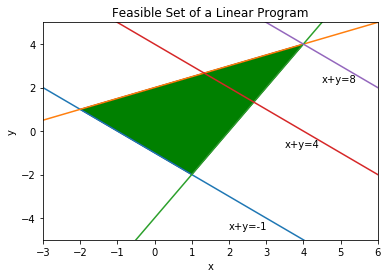

In [8]:
xp = np.array([-3, 6])
# plot the constraints
plt.plot(xp, -xp-1, xp, 0.5*xp+2, xp, 2*xp-4) 
# Draw the lines
plt.plot(xp, -xp+4, xp, -xp+8)
# Draw the feasible set (filled triangle)
path = mpl.path.Path([[4, 4], [1, -2], [-2, 1], [4, 4]])            
patch = mpl.patches.PathPatch(path, facecolor='green')               
# Add the triangle to the plot
plt.gca().add_patch(patch)                                          
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Set of a Linear Program')
plt.xlim(-3,6)
plt.ylim(-5,5)
plt.text(2, -4.5, "x+y=-1")
plt.text(3.5, -0.75, "x+y=4")
plt.text(4.5, 2.25, "x+y=8")
plt.show()

Now, to solve the following LP problem (LP2):

\begin{align}
 \text{minimize: }   & x + y\nonumber\\
 \text{Subject to: } & x + y \geq -1 \\
 \text{}             & \frac{x}{2}-y \leq -2\nonumber\\
 \text{}             & 2x-y  \leq -4\nonumber
\end{align}

we change the objective function in the code:

In [9]:
objective = cp.Minimize(x+y)
p = cp.Problem(objective, constraints)

In [10]:
result = p.solve()
print(round(result,5))

-1.0


The optimal solution is now given by:

In [11]:
x_star = x.value
print(np.round(x_star,5))

[0.09705]


In [12]:
y_star = y.value
print(np.round(y_star,5))

[-1.09705]


In this case the optimal value of the objective function is unique. However, it can be seen in Figure ref{LPfeas} that any point on the line connecting the two points (-2,1) and (1,-2) including the point (0.49742,-1.49742) can be the optimal solution. Therefore, the LP problem ref{LP2} has infinite optimal solutions. The code, however, returns just one of the optimal solutions.

*Example:* Finding the Chebyshev center of a polyhedron is an example of optimization problems that can be solved using LP \cite{cvx}. However, the original description of the problem is not in LP form. Consider the following polyhedron:
\begin{equation}
\mathcal{P} = \{x | a_i^Tx \leq b_i, i=1,...,m \}
\end{equation}
The Chebyshev center of $\mathcal{P}$ is the center of the largest ball in $\mathcal{P}$:
\begin{equation}
\mathcal{B}=\{x|\|x-x_c\|\leq r\}
\end{equation}
In order for $\mathcal{B}$ to be inside $\mathcal{P}$, we need to have $a_i^Tx\leq b_i$ for all $x$ in $\mathcal{B}$ and all $i$ from $1$ to $m$. For each $i$, the point with the largest value of $a_i^Tx$ is:
$$x^\star=x_c+\frac{r}{\sqrt{a_i^Ta_i}}a_i=x_c+\frac{r}{\|a_i\|_2}a_i$$
Therefore, if we have:
$$a_i^Tx_c+r\|a_i\|_2\leq b_i$$
for all $i=1,..,m$ then $\mathcal{B}$ is inside $\mathcal{P}$. Now, we can write the problem as the following LP problem (LP3):
\begin{align}
 \text{maximize: }   & r\nonumber\\
 \text{Subject to: } & a_i^Tx_c + r\|a_i\|_2 \leq b_i,\ i=1,..,m
\end{align}
As a numerical example, consider a polyhedron $\mathcal{P}$ where:
\begin{align}
a_1 =&[-1,-1]^T,\ b_1=1\nonumber\\
a_2 =&[-1/2,1]^T,\ b_2=2\nonumber\\
a_3 =&[2,-1]^T,\ b_3=4\nonumber
\end{align}
This is a triangle. The Chebyshev center of this triangle is computed as:

In [13]:
r = cp.Variable(1)
xc = cp.Variable(2)

a1 = co.matrix([-1,-1], (2,1))
a2 = co.matrix([-0.5,1], (2,1))
a3 = co.matrix([2,-1], (2,1))

b1 = 1
b2 = 2
b3 = 4

constraints = [ a1.T*xc + np.linalg.norm(a1, 2)*r <= b1,
				a2.T*xc + np.linalg.norm(a2, 2)*r <= b2,
				a3.T*xc + np.linalg.norm(a3, 2)*r <= b3 ]

objective = cp.Maximize(r)

p = cp.Problem(objective, constraints)
result = p.solve()

The radius of the ball is:

In [14]:
print(r.value)

[1.5289612]


and the Chebyshev center is located at:

In [15]:
print(xc.value)

[0.58113883 0.58113883]


The triangle and the largest circle that it can include are depicted in Figure ref{Cheb} using the following commands:

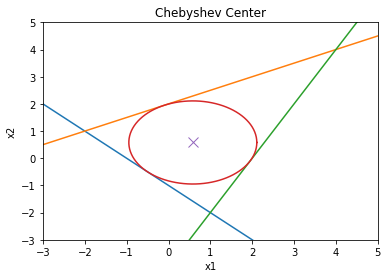

In [16]:
xp = np.linspace(-3, 5, 256)
theta = np.linspace(0,2*np.pi,100)

# plot the constraints
plt.plot( xp, -xp*a1[0]/a1[1] + b1/a1[1])
plt.plot( xp, -xp*a2[0]/a2[1] + b2/a2[1])
plt.plot( xp, -xp*a3[0]/a3[1] + b3/a3[1])


# plot the solution
plt.plot( xc.value[0] + r.value*cos(theta), xc.value[1] + r.value*sin(theta) )
plt.plot( xc.value[0], xc.value[1], 'x', markersize=10 )

plt.title('Chebyshev Center')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([-3, 5, -3, 5])
plt.show()

### Generalized linear fractional program

A linear fractional program is defined as (LFP):
\begin{align}
\text{minimize }&f_0(x)\nonumber\\
\text{subject to }&a_i^\text{T}x\leq b_i,\ i=1,\ldots,m\nonumber\\
                  &h_i^\text{T}x = g_i,\ i=1,\ldots,p
\end{align}
with $f_0(x)=\frac{c^\text{T}x+d}{e^\text{T}x+f}$ and $\text{dom}f_0(x)=\{x|e^\text{T}x+f > 0\}$. The problem (ref{LFP}) can be rewritten as:
\begin{align}
\text{minimize }&\frac{c^\text{T}x+d}{e^\text{T}x+f}\nonumber\\
\text{subject to }&e^\text{T}x+f > 0\nonumber\\
                  &a_i^\text{T}x\leq b_i,\ i=1,\ldots,m\nonumber\\
                  &h_i^\text{T}x = g_i,\ i=1,\ldots,p
\end{align}
is a quasilinear (both quasiconvex and quasiconcave) optimization problem. To solve the problem using the bisection method, we need to write it as:
\begin{align}
\text{minimize }&t\nonumber\\
\text{subject to }&c^\text{T}x+d\leq t(e^\text{T}x+f)\nonumber\\
                  &e^\text{T}x+f > 0\nonumber\\
                  &a_i^\text{T}x\leq b_i,\ i=1,\ldots,m\nonumber\\
                  &h_i^\text{T}x = g_i,\ i=1,\ldots,p
\end{align}
For a fixed $t$, the above problem is a LP feasibility problem. Therefore, the bisection method can be used to find the smallest possible $t$ within acceptable accuracy.

Another approach is introduce auxiliary variables $y$ and $z$:
\begin{align}
y =& \frac{x}{e^\text{T}x+f}\nonumber\\
z =& \frac{1}{e^\text{T}x+f}
\end{align}
Then the optimization problem (ref{LFP}) can be written as the following LP problem:
\begin{align}
\text{minimize }&c^\text{T}y+dz\nonumber\\
\text{subject to }&z > 0\nonumber\\
                  &e^\text{T}y+fz=1\nonumber\\
                  &a_i^\text{T}y\leq b_iz,\ i=1,\ldots,m\nonumber\\
                  &h_i^\text{T}y = g_iz,\ i=1,\ldots,p
\end{align}
Therefore, linear fractional programs can be converted to convex optimization problems.

A closely related class of optimization problems is the generalized linear fraction problems formulated as (GLFP):
\begin{align}
\text{minimize }&f_0(x)\nonumber\\
\text{subject to }&a_i^\text{T}x\leq b_i,\ i=1,\ldots,m\nonumber\\
                  &h_i^\text{T}x = g_i,\ i=1,\ldots,p
\end{align}
where:
\begin{equation}
f_0(x)=\max_{i=1,\ldots,r} \frac{c_i^\text{T}x+d_i}{e_i^\text{T}x+f_i}
\end{equation}
and the domain of $f_0(x)$ is defined as:
\begin{equation}
\text{dom}f_0(x)=\{x|e_i^\text{T}x+f_i > 0, \text{for }i=1,\ldots,r\}
\end{equation}


### Quadratic program

A quadratic programming (QP) optimization problem is described as:
\begin{align}
\text{minimize }&\frac{1}{2}x^\text{T}Px+q^\text{T}x+r\nonumber\\
\text{subject to }&Gx \preccurlyeq h \nonumber\\
                  &Ax = b
\end{align}
$P$ is assumed to be positive semidefinite. The feasible set of QP is a polygon and the objective function is a convex quadratic function.

If the objective function is quadratic and the constraints include quadratic constraints, then we have a quadratically constrained quadratic program (QCQP):
\begin{align}
\text{minimize }&\frac{1}{2}x^\text{T}P_0x+q_0^\text{T}x+r_0\nonumber\\
\text{subject to }&\frac{1}{2}x^\text{T}P_ix+q_i^\text{T}x+r_i\leq 0,\ i=1\cdots,m \nonumber\\
                  &Ax = b
\end{align}
where $P_i$ for $i=0,\cdots,m$ are positive semidefinite.

*Example:* Consider the set of linear equations $Ax=b$ for the case when $A$ has more rows than columns. Finding an $x$ where the equality is exactly satisfied is in general impossible. However, there is a solution for an $x$ that minimizes the cost function $e^\text{T}e$ where $e=Ax-b$. The solution is even analytic and it can be written as:
\begin{equation}
x^\star = (A^\text{T}A)^{-1}A^\text{T}
\end{equation}
However, after adding linear constraints on $x$, the optimization problem does not have an analytic solution:
\begin{align}
\text{minimize }&(Ax-b)^\text{T}(Ax-b)\nonumber\\
\text{subject to }&Gx \preccurlyeq h \nonumber\\
\end{align}
As a numerical example, consider:
\begin{equation}
A = \bmat{cc} 1 & 1 \\ 2 & 1\\ 3 & 2 \emat,\ b=\bmat{c} 2\\ 3 \\ 4\emat
\end{equation}
The analytical answer to $Ax=b$ is computed as:

In [17]:
A = np.array([[1,1],[2,1],[3,2]])
b = np.array([[2], [3], [4]])
xs = np.dot(np.linalg.pinv(A),b)
print(xs)

[[1.        ]
 [0.66666667]]


A similar result can be reached by solving the following QP problem:

In [18]:
x = cp.Variable((2,1))
I = np.identity(3)
objective = cp.Minimize(  cp.quad_form(A@x-b, I) )

p = cp.Problem(objective)

The optimal value of the objective function is:

In [19]:
result = p.solve()
print(result)

0.3333333333333337


and the optimal solution is:

In [20]:
print(x.value)

[[1.        ]
 [0.66666667]]


Now, we can add linear constraints and find the optimal solution by solving the QP problem:

In [21]:
x = cp.Variable(2)

objective = cp.Minimize(  b.T@b - 2*b.T@A@x + cp.quad_form(x, A.T@A)  )

constraints = [ -0.9 <= x, x <= 0.9]

p = cp.Problem(objective, constraints)

The optimal cost function is equal to:

In [22]:
result = p.solve()
print(result)

0.33833333333333826


which is more than what it was without the linear constraints. The optimal solution is equal to:

In [23]:
print(x.value)

[0.9        0.81666667]


*Example (Linear Program with a Stochastic Objective Function):* Consider a random vector $c$ and the following LP problem:
\begin{align}
\text{minimize }&c^\text{T}x\nonumber\\
\text{subject to }& Gx \preccurlyeq h \nonumber\\
                  & Ax = b
\end{align}
Assume that $c$ is a random vector with the normal distribution of $\mathcal{N}(\bar c,\Sigma)$. 
Also we assume that $x$, the unknown vector, is deterministic. With this assumptions, the objective function $c^\text{T}x$ is a normal random variable with mean ${\bar c}^\text{T}x$ and variance $x^\text{T}\Sigma x$.

One way to formulate the problem so that it is practically solveable is to set the objective function as:
\begin{equation}
{\bar c}^\text{T}x+\gamma x^\text{T}\Sigma x
\end{equation}
where $\gamma\geq 0$. This objective function is called the risk-sensitive cost and $\gamma$ is call the risk-aversion parameter. The larger $\gamma$ is, the more the uncertainty of the original objective function is penalized and it thus leads to a more certain result. With this approach, the problem is formulated as the following deterministic LP:
\begin{align}
\text{minimize }&{\bar c}^\text{T}x+\gamma x^\text{T}\Sigma x\nonumber\\
\text{subject to }& Gx \preccurlyeq h \nonumber\\
                  & Ax = b
\end{align}
As a numerical example, let us consider an uncertain version of ref{LP2}:
\begin{align}
\bar c=&\bmat{c} 22\\ 14.5 \emat \nonumber\\
\Sigma=&\bmat{ccc} 5 & 1\\ 1 & 4 \emat\nonumber\\
G =&\bmat{cc} -1 & -1\\ -0.5 & 1\\ 2 & -1 \emat \nonumber\\
h =&\bmat{c} 1\\2\\4\emat
\end{align}

Now, the optimization can be solved with the following code:

In [24]:
Sigma = co.matrix([	5, 1,
				    1, 4,], (2,2))
cb = co.matrix([1, 1], (2,1))

G = co.matrix([ -1, -0.5,  2,
                -1,    1, -1], (3,2))

h = co.matrix([ 1,
                2,
                4],(3,1))
gamma = 0.5

x = cp.Variable((2,1))

objective = cp.Minimize(  cb.T * x + gamma * cp.quad_form(x, Sigma) )

constraints = [ G*x <= h  ]

p = cp.Problem(objective, constraints)

The optimal value of the objective function is:

In [25]:
result = p.solve()
print(result)

-0.1842105263157895


The optimal solution, in this case, is inside of the feasible set:

In [26]:
print(x.value)

[[-0.15789474]
 [-0.21052632]]


In the following figure, the feasible set and the contours of the objective function are drawn.

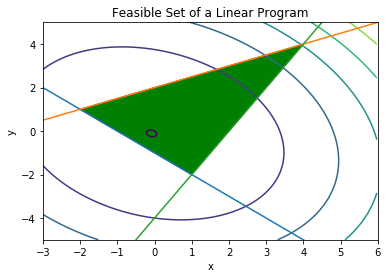

In [27]:
xp = np.array([-3, 6])
# plot the constraints
plt.plot(xp, -xp-1, xp, 0.5*xp+2, xp, 2*xp-4)
# Draw the feasible set (filled triangle)
path = mpl.path.Path([[4, 4], [1, -2], [-2, 1], [4, 4]])            
patch = mpl.patches.PathPatch(path, facecolor='green')               
# Add the triangle to the plot
plt.gca().add_patch(patch)                                          
plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Set of a Linear Program')
plt.xlim(-3,6)
plt.ylim(-5,5)
delta = 0.025
xc = np.arange(-3.0, 6.0, delta)
yc = np.arange(-5.0, 6.0, delta)
X, Y = np.meshgrid(xc, yc)
Z = cb[0]*X + cb[1]*Y + Sigma[0,0]*X*X + 2*Sigma[0,1]*X*Y + Sigma[1,1]*Y*Y
plt.contour(X, Y, Z)
X, Y = np.meshgrid(x, y)
plt.show()

*Example (Distance between polyhedra):* Consider the following two polyhedra:
\begin{equation}
\mathcal{P}_1=\{x| A_1x \preccurlyeq b_1\},\ \mathcal{P}_2=\{x| A_2x \preccurlyeq b_2\}
\end{equation}
The distance between $\mathcal{P}_1$ and $\mathcal{P}_2$ is defined as:
\begin{equation}
\text{d}(\mathcal{P}_1,\mathcal{P}_2)=\inf\{\|x_1-x_2\|_2 | x_1\in\mathcal{P}_1,\ x_2\in\mathcal{P}_2\}
\end{equation}
This ditance can computed using the following QP problem:
\begin{align}
\text{minimize }& \|x_1-x_2\|_2^2\nonumber\\
\text{subject to }&A_1x \preccurlyeq b_1 \nonumber\\
                  &A_2x \preccurlyeq b_2
\end{align}
As a numerical example, consider the following polygons:

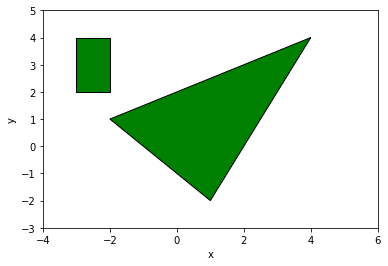

In [28]:
# Draw the triangle
path = mpl.path.Path([[4, 4], [1, -2], [-2, 1], [4, 4]])            
patch = mpl.patches.PathPatch(path, facecolor='green')               
# Add the triangle to the plot
plt.gca().add_patch(patch)
# Draw the rectangle
path = mpl.path.Path([[-3, 4], [-2, 4], [-2, 2], [-3, 2], [-3, 4]])            
patch = mpl.patches.PathPatch(path, facecolor='green')               
# Add the rectangle to the plot
plt.gca().add_patch(patch)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4,6)
plt.ylim(-3,5)
plt.show()

The distance between these two polygons is computed with the following QP optimization problem:

In [29]:
x1 = cp.Variable((2,1))
x2 = cp.Variable((2,1))

I = np.identity(2)

# Triangle
A1 = co.matrix([ -1, -0.5,  2,
                -1,    1, -1], (3,2))

b1 = co.matrix([ 1,
                2,
                4],(3,1))

# Rectangle
A2 = co.matrix([ -1, 1,  0, 0,
                 0, 0, -1, 1], (4,2))

b2 = co.matrix([ 3,
                -2,
                -2,
                4],(4,1))

objective = cp.Minimize(  cp.quad_form(x1-x2, I) )

constraints = [ A1*x1<= b1, A2*x2<=b2]

p = cp.Problem(objective, constraints)

The distance between the two polygons is:

In [30]:
result=p.solve()
print(result)

0.8000000000000002


The corresponding point in the triangle is:

In [31]:
print(x1.value)

[[-1.6]
 [ 1.2]]


and the corresponding point in the rectangle is:

In [32]:
print(x2.value)

[[-2.]
 [ 2.]]


### Second order cone program

A second order cone program (SOCP) is defined as:
\begin{align}
\text{minimize }& f^\text{T}x\nonumber\\
\text{subject to }&\|A_ix+b_i\|_2\leq c_i^\text{T}x+d_i,\ i=1,\ldots,m\nonumber\\
                  &Fx = g
\end{align}
Note that:

- If $c_i=0$ for $i=1,\ldots,m$, the SOCP is equivalent to a QP.
- If $A_i=0$ for $i=1,\ldots,m$, the SOCP is equivalent to a LP.

*Example (robust linear program):* Consider the following LP problem:
\begin{align}
\text{minimize }&c^\text{T}x\nonumber\\
\text{subject to }& a_i^\text{T}x \leq b_i,\ i=1,\ldots,m 
\end{align}
where the parameters are assumed to be uncertain. For simplicity, let us assume that $c$ and $b_i$ are known and $a_i$ are uncertain and belong to given ellipsoids:
\begin{equation}
a_i \in \mathcal{E}_i = \{\bar a_i+P_iu|\ \|u\|_2\leq 1\}
\end{equation}
For each constraint $a_i^\text{T}x\leq b_i$, it is sufficient that the suprimum value of $a_i^\text{T}x$ be less than or equal to $b_i$. The supremum value can be written as:
\begin{align}
\sup\{a_i^\text{T}x|a_i\in\mathcal{E}_i \} =& \bar a_i^\text{T}x+\sup\{ u^\text{T}P_i^\text{T}x |\ \|u\|_2\leq 1\}\nonumber\\
&\bar a_i^\text{T}x+\|P_i^\text{T}x\|_2
\end{align}
Therefore, the robust LP problem can be written as the following SOCP problem:
\begin{align}
\text{minimize }&c^\text{T}x\nonumber\\
\text{subject to }& \bar a_i^\text{T}x+\|P_i^\text{T}x\|_2 \leq b_i,\ i=1,\ldots,m 
\end{align}

*Example (stochastic linear program):* The same robust LP problem can be addressed in a stochastic framework. In this framework, $a_i$ are assumed to be independent normal random vectors with the distribution $\mathcal{N}(\bar a_i, \Sigma_i)$. The requirement is that each constraint $a_i^\text{T}x\leq b_i$ should be satisfied with a probability more than $\eta$, where $\eta\geq 0.5$.

Assuming that $x$ is deterministic, $a_i^\text{T}x$ is a scalar normal random variable with mean $\bar u=\bar a_i^\text{T}x$ and variance $\sigma=x^\text{T}\Sigma_ix$. The probability of $a_i^\text{T}x$ being less than $b_i$ is $\Phi((b_i-\bar u)/\sigma)$ where $\Phi(z)$ is the cumulative distribution function of a zero mean unit variance Gaussian random variable:
\begin{equation}
\Phi(z)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^ze^{-t^2/2}dt
\end{equation}
Therefore, for the probability of $a_i^\text{T}x\leq b_i$ be larger than $\eta$, we should have:
\begin{equation}
\Phi\left(\frac{b_i-\bar u}{\sigma}\right)\geq \eta
\end{equation}
This is equivalent to:
\begin{align}
\bar a_i^\text{T}x+\Phi^{-1}(\eta)\sigma\leq b_i \nonumber\\
\bar a_i^\text{T}x+\Phi^{-1}(\eta)\|\Sigma^{1/2}x\|_2 \leq b_i 
\end{align}
Therefore, the stochastic LP problem:
\begin{align}
\text{minimize }&c^\text{T}x\nonumber\\
\text{subject to }& \text{prob} (a_i^\text{T}x \leq b_i)\geq \eta,\ i=1,\ldots,m 
\end{align}
can be reformulated as the following SOCP:
\begin{align}
\text{minimize }&c^\text{T}x\nonumber\\
\text{subject to }& \bar a_i^\text{T}x+\Phi^{-1}(\eta)\|\Sigma^{1/2}x\|_2 \leq b_i,\ i=1,\ldots,m 
\end{align}


*Example:* Consider the equation $Ax=b$ where $x\in\mathbb{R}^n$, $A\in\mathbb{R}^{m\times n}$ and $b\in\mathbb{R}^m$. It is assumed that $m>n$. Let us consider the following optimization problem:
\begin{equation}
\text{minimize }\|Ax-b\|_2+\gamma\|x\|_1
\end{equation}
The objective function is a weighted sum of the 2-norm of equation error and the 1-norm of $x$. The optimization problem can be written as the following SOCP problem:
\begin{align}
\text{minimize }& t\nonumber\\
                & \|Ax-b\|_2+\gamma \sum_{i=1}^n t_i\leq t\nonumber\\
                & -t_i \leq x_i \leq t_i, i=1,\ldots,n
\end{align}
As a numerical example, consider:
\begin{equation}
A = \bmat{cc} 1 & 1 \\ 2 & 1\\ 3 & 2 \emat,\ b=\bmat{c} 2\\ 3 \\ 4\emat,\ \gamma = 0.5
\end{equation}
The optimization problem can be solved using the following code:

In [33]:
x = cp.Variable((2,1))
t = cp.Variable(1)
t1 = cp.Variable(1)
t2 = cp.Variable(1)
gamma = 0.5

A = co.matrix([[1,2,3],[1,1,2]])
b = co.matrix([2, 3, 4],(3,1))
objective = cp.Minimize(t)

constraints = [cp.norm(A*x-b)+gamma*(t1+t2) <= t, -t1 <= x[0], x[0] <= t1, -t2 <= x[1], x[1] <= t2 ]

p = cp.Problem(objective, constraints)

The optimal value of the objective function is:

In [34]:
result=p.solve()
print(result)

1.3603796063458191


and the optimal solution is:

In [35]:
print(x.value)

[[1.31625776]
 [0.1395756 ]]


Thanks to cvxpy, the same problem can be solved using a much shorter code:

In [36]:
p = cp.Problem(cp.Minimize(cp.norm(A*x-b)+gamma*cp.norm(x,1)), [])
result=p.solve()
print(x.value)

[[1.31623464]
 [0.13961018]]


### Semidefinite program

Generalized inequalities can be defined based on proper cones. Till now we have seen inequalities for real numbers and elementwise inequalities real vectors. The former type of inequality is defined by the propoer cone of nonnegative real numbers. The latter type is defined by the proper cone of the nonnegative orthant ($\mathbb{R}^n_+$) in $\mathbb{R}^n$. One natural extension of the optimization problems we have seen so far is to define the inequalities by the proper cone of positive semidefinite matrices. For example, consider the following linear optimization problem:
\begin{align}
\text{minimize}  & c^\text{T}x\nonumber\\
\text{subject to}& Fx+g\preccurlyeq_{\mathcal{S}^n_+} 0\nonumber\\
                 & Ax=b
\end{align}
where $\mathcal{S}^n_+$ is the cone of positive semidefinite matrices in $\mathcal{R}^{n\times n}$. In other words, the first constraint of the above optimization problem says that $Fx+g$ is positive semidefinite. This is an extension of linear programming.

A semidefinite program (SDP) is defined as:
\begin{align}
\text{minimize}  & c^\text{T}x\nonumber\\
\text{subject to}& x_1F_1+x_2F_2+\cdots+x_nF_n+G \leq 0\nonumber\\
                 & Ax=b
\end{align}
where $x =\left[\begin{matrix}x_1&x_2&\cdots&x_n\end{matrix}\right]^\text{T}$ is a vector in $\mathbb{R}^n$ and $F_i, i=1,\ldots,m$ and $G$ are symetric matrices in $\mathcal{R}^{m\times m}$.

Note that the standard LP problem:
\begin{align}
\text{minimize}&c^\text{T}x\nonumber\\
               &Ax\preccurlyeq b
\end{align}
can be written as the following SDP problem:
\begin{align}
\text{minimize}&c^\text{T}x\nonumber\\
               &\text{diag}(Ax) \leq b
\end{align}
where $\text{diag}(v)$ for $v\in\mathbb{R}^n$ is a diagonal matrix in $\mathbb{R}^{n\times n}$ with $v$ as the main diagonal.

Also the standard SOCP problem:
\begin{align}
\text{minimize}&c^\text{T}x\nonumber\\
               &\|A_ix+b_i\|_2 \leq c_i^\text{T}x+d_i,\ i=1,\ldots,m
\end{align}
can be written as the following SDP problem:
\begin{align}
\text{minimize}&c^\text{T}x\nonumber\\
               & \left[\begin{matrix} (c_i^\text{T}x+d_i)I & A_ix+b_i\\ A_ix+b_i & c_i^\text{T}x+d_i\end{matrix}\right] \geq 0,\ i=1,\ldots,m
\end{align}

*Example (eigenvalue minimization):* Consider minimizing the maximum eigenvalue of matrix $A(x)$:
\begin{align}
\text{minimize}& \lambda_\max(A(x))
\end{align}
where $A(x)=A_0+x_1A_1+\cdots+x_nA_n$ where $A_i$'s are symmetric matrices. This can be written as the following SDP problem:
\begin{align}
\text{minimize}&t\nonumber\\
               & A(x)\leq tI
\end{align}
As a numerical example, consider:
\begin{equation}
A(x) = \left[\begin{matrix} x_3 & 0 & 0 & x_1+x_2-2\\ 0 & x_3 & 0 & 2x_1+x_2-3\\0 & 0 & x_3 & 3x_1+2x_2-4\\ x_1+x_2-2 & 2x_1+x_2-3 & 3x_1+2x_2-4 & x_3 \end{matrix}\right]
\end{equation}
We would like to minimize the largest eigenvalue of $A$ subject to $A$ being a positive semidefinite matrix. The following code solves this problem:

In [37]:
x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()
t = cp.Variable()
X = cp.Variable((4,4), PSD=True)
Y = cp.Variable((4,4), PSD=True)

A0 = co.matrix([[0,0,0,-2],[0,0,0,-3],[0,0,0,-4],[-2,-3,-4,0]])
A1 = co.matrix([[0,0,0,1],[0,0,0,2],[0,0,0,3],[1,2,3,0]])
A2 = co.matrix([[0,0,0,1],[0,0,0,1],[0,0,0,2],[1,1,2,0]])
A3 = co.matrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
I = co.matrix(np.identity(4))

objective = cp.Minimize(t)

Ax = A0+A1*x1+A2*x2+A3*x3
constraints = [ Ax == X, t*I-Ax == Y ]
p = cp.Problem(objective, constraints)

The optimal largest eigenvalue of $A(x)$ is equal to:

In [38]:
result=p.solve(solver=cp.SCS)
print(result)

1.1547004079345662


The optimal solution for $x$ is:

In [39]:
print([x1.value,x2.value,x3.value])

[array(0.99999983), array(0.66666697), array(0.57734998)]


The value of $A(x)$ for the optimal solution is equal to:

In [40]:
print(Ax.value)

[[ 0.57734998  0.          0.         -0.33333321]
 [ 0.          0.57734998  0.         -0.33333338]
 [ 0.          0.          0.57734998  0.33333342]
 [-0.33333321 -0.33333338  0.33333342  0.57734998]]


In this case, eigenvalues of $A(x)$ are equal to:

In [41]:
EigenValues = np.linalg.eig(Ax.value)[0]
print(EigenValues)

[ 1.15470025e+00  5.77349976e-01 -2.92780017e-07  5.77349976e-01]


## Applications in Control Theory

Many problems in control theory can be formulated as convex optimization problems. It is beyond the scope of this text to cover all of them. However, in the following, you will see an introduction about applications of convex optimization in control theory.

### Stability

Consider the following autonomous system:
\begin{equation}
\dot x = f(x),\ x(0)=x_0
\end{equation}
with $x\in\mathbb{R}^n$ and $t\geq 0$. A solution of this system with initial condition $x(0)=x_0$ is denoted by $\phi(t,x_0)$.

$x^\star$ is an equilibrium point of this system if:
\begin{equation}
\forall t \geq 0, \phi(t,x^\star)=x^\star
\end{equation}

*Definition [2]:* An equilibrium point $x^\star$ is:

- *stable* (in the sense of Lyapunov) if for any given $\epsilon>0$,    there exists $\delta(\epsilon)>0$ such that:
 \begin{equation}
  \|x_0-x^\star\|\leq \delta \Rightarrow \lim_{t\rightarrow     \infty}\|\phi(t,x_0)-x^\star\|=0 
  \end{equation}
- *attractive* if there exists $\delta>0$ such that:
  \begin{equation}
  \|x_0-x^\star\|\leq\delta \Rightarrow \lim_{t\rightarrow \infty}\|\phi(t,x_0)-x^\star\|=0
  \end{equation}
- *asymptotically stable* (in the sense of Lyapunov) if it is both stable and attractive.

*Theorem [3]:* If there exists a continuous function $V(x)$ defined in a forward invariant set $\mathcal{X}$ of the autonomous system (*) such that:
\begin{align}
V(x^\star)=0,\nonumber\\
V(x) > 0,\ \forall x\in\mathcal{X} \text{ such that } x\neq x^\star\nonumber\\
t_1\leq t_2\Rightarrow V(\phi(t_1,x_0)) \geq V(\phi(t_2,x_0))
\end{align}
then $x^\star$ is a stable equilibrium point. Moreover if there exists a continuous function $Q(x)$ such that:
\begin{equation}
Q(x^\star)=0,\nonumber\\
Q(x)>0,\ \forall x\in\mathcal{X} \text{ such that } x\neq x^\star\nonumber\\
t_1\leq t_2\Rightarrow V(\phi(t_1,x_0)) \geq V(\phi(t_2,x_0))+\int_{t_1}^{t_2} Q(\phi(\tau,x_0))d\tau\nonumber\\
\|x\|\rightarrow\infty \Rightarrow V(x)\rightarrow\infty
\end{equation}
then $x^\star$ is an asymptotically stable equilibrium point.

#### Linear Systems

Consider the linear system:
\begin{equation}
\dot x=Ax, x(0)=x_0
\end{equation}
where $x\in\mathbb{R}^n$. The only equilibrium point of this system is $x^\star=0$. Consider the following candidate Lyapunov function:
\begin{equation}
V(x)=x^\text{T}Px
\end{equation}
where $P\in\mathbb{n\times n}$ is a positive definite matrix and therefore $V(x)>0$ for $x\neq 0$. The linear system () is stable if there exists a $P$:
\begin{equation}
\dot V(x) = (Ax)^\text{T}Px+x^\text{T}PAx < 0
\end{equation}
In case of linear systems, the existence of a Lyapunov function is a necessary and sufficient condition for stability. The Lyapunov conditions can be written as the following linear matrix inequalities:
\begin{align}
P>0\nonumber\\
A^\text{T}P+PA<0
\end{align}


*Example:* Consider a linear system with:
\begin{equation}
A=\left[\begin{matrix}0&1\\-1&-2\end{matrix}\right]
\end{equation}
The eigenvalues of $A$ are negative:

In [42]:
A = np.matrix('0 1; -1 -2')
np.linalg.eig(A)[0]

array([-1., -1.])

Therefore, the system is stable. In the following, we now verify the stability of the system by solving the following LMIs:

In [43]:
A = cp.Parameter((2,2))
P = cp.Variable((2,2))

objective = cp.Minimize( 0 )
prob = cp.Problem(objective, [A.T*P+P*A << 0, P >> 0])
A.value = np.matrix('0 1; -1 -2')
prob.solve()

0.0

where SDPVar(n,n) is an auxiliary positive semi-definite matrix. Since the stability LMIs are a feasibility problem as opposed to an optimization problem, we have set the objective function to be a constant value. The optimal solution of the above LMIs is:

In [44]:
print(P.value)

[[0. 0.]
 [0. 0.]]


However, this is the trivial answer of these LMIs:
\begin{align}
P\geq 0\nonumber\\
A^\text{T}P+PA\leq 0
\end{align}
In order to find a feasible answer for strict inequalities using non-strict inequalities, we can rewrite the inequalities as:
\begin{align}
P-\epsilon I\geq 0\nonumber\\
A^\text{T}P+PA+\alpha P\leq 0
\end{align}
Let us now solve the following LMIs to find a valid Lyapunov function for the linear system:

In [45]:
I = np.identity(2)

prob = cp.Problem(objective, [A.T*P+P*A+0.5*P << 0, P - 0.1*I >> 0])
prob.solve()

0.0

In [46]:
print(P.value)

[[0.2482492  0.10857741]
 [0.10857741 0.19929398]]


It is also possible to add an objective function to the LMIs, for example $\lambda_{max}(P)$, the largest eigenvalue of $P$, to have a better conditioned $P$ in the solution:

In [47]:
objective = cp.Minimize( cp.lambda_max(P) )
prob = cp.Problem(objective, [A.T*P+P*A+0.5*P << 0, P - 0.1*I >> 0])
prob.solve()

0.17777289938604374

The optimal solution is now equal to:

In [48]:
print(P.value)

[[0.1388843  0.0388868 ]
 [0.0388868  0.13888458]]


We can verify the inequalities by computing the eigenvalues:

In [49]:
np.linalg.eig(P.value)[0]

array([0.09999764, 0.17777124])

In [50]:
np.linalg.eig( (A.T*P+P*A).value )[0]

array([-0.06318351, -0.49235481])

#### Uncertain Linear Systems

Consider the following linear system:
\begin{equation}
\dot x=A(\alpha)x, x(0)=x_0
\end{equation}
where $A\in\mathbb{R}^{n\times n}$ is an uncertain matrix such that:
\begin{equation}
A(\alpha)=\sum_{i=1}^L \alpha_i A_i
\end{equation}
where $A_i$ for $i=1,\ldots,L$ are known matrices and $\alpha_i$ for $i=1,\ldots,L$ are unknown scalars such that:
\begin{equation}
\sum_{i=1}^L \alpha_i=1 
\end{equation}
This system can also be written as a linear differential inclusion:
\begin{equation}
\dot x\in Ax
\end{equation}
where $A\in\text{conv}(\{A_1,\ldots,A_L\})$
Using the Lyapunov theorem, it can be shown that the uncertain linear system is asymptotically stable if there exists a $P$ such that:
\begin{align}
P &> 0\nonumber\\
A_i^\text{T}P+PA_i &< 0, i=1,\ldots,L
\end{align}
Note that this condition is stronger than saying all the $A_i$'s have to be stable. In addition to that, it is required that all the $A_i$'s share the same $P$.

*Example:* Consider the uncertain linear system () with $L=2$ and:
\begin{equation}
A_1=\left[\begin{matrix}1&-2\\2&-2\end{matrix}\right],\ A_2=\left[\begin{matrix}1&2\\-2&-2\end{matrix}\right]
\end{equation}
The eigenvalues of $A_1$ and $A_2$ are on the left side of the complex plane and even equal:

In [51]:
A1 = np.matrix('1 -2; 2 -2')
np.linalg.eig(A1)[0]

array([-0.5+1.32287566j, -0.5-1.32287566j])

In [52]:
A2 = np.matrix('1 2; -2 -2')
np.linalg.eig(A2)[0]

array([-0.5+1.32287566j, -0.5-1.32287566j])

However, an uncertain linear system with $A$ in the convex hull of $A_1$ and $A_2$ is not stable. For example $A=0.5A_1+0.5A_2$ is not stable:

In [53]:
np.linalg.eig(0.5*A1+0.5*A2)[0]

array([ 1., -2.])

That is a proof for the following LMIs to be infeasible:

In [54]:
A1 = cp.Parameter((2,2))
A2 = cp.Parameter((2,2))
P = cp.Variable((2,2))
I = np.identity(2)

objective = cp.Minimize( cp.lambda_max(P) )
prob = cp.Problem(objective, [P - 0.1*I >> 0, A1.T*P+P*A1+0.5*P << 0, A2.T*P+P*A2+0.5*P << 0])
A1.value = np.matrix('1 -2; 2 -2')
A2.value = np.matrix('1 2; -2 -2')
prob.solve()

inf

#### State Feedback Controller

Consider the following linear system:
\begin{equation}
\dot x=Ax+Bu
\end{equation}
where $x\in\mathbb{R}^n$ and $u\in\mathbb{R}^m$ denote the state and input vectors. The objective is to design a state feedback of the form:
\begin{equation}
u = Kx
\end{equation}
to stabilize the closed loop system:
\begin{equation}
\dot x = (A+BK)x
\end{equation}
This system is stable if there exists a $P$ such that:
\begin{align}
{\color{red}P}>0\nonumber\\
(A+B{\color{red}K})^\text{T}{\color{red}P}+{\color{red}P}(A+B{\color{red}K}) < 0
\end{align}
The unknown matrices in these inequalities are shown in red. As you see, this is not a LMI but it is a bilinear matrix inequality (BMI). BMI's are hard to solve in general. However, there is a trick for this special BMI to convert it to an LMI.

We know that the eigenvalues of a matrix and its transpose are the same. Therefore, the closed loop system () is stable if and only if its dual system is stable:
\begin{equation}
\dot x = (A+BK)x
\end{equation}
Now, let us write stability inequalities for the dual system:
\begin{align}
{\color{red}Q}>0\nonumber\\
(A+B{\color{red}K}){\color{red}Q}+{\color{red}Q}(A+B{\color{red}K})^\text{T} < 0
\end{align}
This is still a BMI. However, if we define $Y=KQ$, we can write the inequalities as:
\begin{align}
{\color{red}Q}>0\nonumber\\
A{\color{red}Q}+{\color{red}Q}A^\text{T}+B{\color{red}Y}+{\color{red}Y}^\text{T}B^\text{T} < 0
\end{align}
Now, this is a LMI. After solving the LMI, if it is feasible, the controller gain $K$ can be computed as:
\begin{equation}
K = YQ^{-1}
\end{equation}
Another way of converting () to a LMI is to multiply both sides of both inequalities by $Q=P^{-1}$ and perform the same trick.

*Example:* Consider the following linear system:
\begin{equation}
\dot x = \left[\begin{matrix}1&0.1\\0&-2\end{matrix}\right]x+\left[\begin{matrix}0\\1\end{matrix}\right]u
\end{equation}
The objective is to find $K$ such that with $u=Kx$ the closed loop system is stable.

In [55]:
A = cp.Parameter((2,2))
B = cp.Parameter((2,1))
Q = cp.Variable((2,2))
Y = cp.Variable((1,2))
I = np.identity(2)

objective = cp.Minimize( cp.lambda_max(Q) )
prob = cp.Problem(objective, [Q - 0.1*I >> 0, A*Q+Q*A.T+B*Y+Y.T*B.T+0.5*Q << 0])
A.value = np.matrix('1 0.1; 0 -2')
B.value = np.matrix('0; 1')
prob.solve()

62.69984061636447

The controller gain can now be computed as:

In [56]:
K = np.dot(Y.value,np.linalg.inv(Q.value))
print(K)

[[-31.70418601   0.47166511]]


The closed loop system is stable:

In [57]:
Acl = (A.value+B.value*K)
np.linalg.eig(Acl)[0]

array([-0.26416744+1.25391358j, -0.26416744-1.25391358j])

### Dissipativity

Similar to stability for autonomous systems, there is a concept called dissipativity for dynamic systems with input. Consider the following dynamical system:
\begin{align}
\dot x=&f(x,w)\nonumber\\
z=&g(x,w)
\end{align}
where $x\in\mathbb{R}^n$ is the state, $u\in\mathbb{R}^m$ is the input and $z\in\mathbb{R}^p$ is the output vector.

*Definition:* The system () is said to be dissipative with storage function $V$ and supply rate $W$, if:
\begin{equation}
t_1\leq t_2\Rightarrow V(x(t_1))+\int_{t_1}^{t_2}W(z(\tau),w(\tau))d\tau\geq V(x(t_2))
\end{equation}
If the storage function and the trajectory of the system are smooth, this inequality can be written as:
\begin{equation}
\nabla_x V(x).\dot x\leq W(z,w)
\end{equation}

Now, consider the following linear system:
\begin{align}
\dot x=&Ax+Bw\nonumber\\
z=&Cx+Dw
\end{align}
with $x(0)=0$. It is assumed that all the eigenvalues of $A$ have negative real values. In the followin, we will review a few special cases of dissipativity.

#### QSR Dissipativity

The following statements are equivalent:

- The system is strictly dissipative with the supply rate:
  \begin{equation}
  s(w,z)=\left[\begin{matrix} w\\\\z\end{matrix}\right]^\text{T} \left[\begin{matrix} Q&S\\\\S^\text{T}& R\end{matrix}\right] \left[\begin{matrix} w\\\\z \end{matrix}\right]
  \end{equation}
- For all $\omega\in\mathbb{R}\cup\{\infty\}$ there holds:
  \begin{equation}
  \left[\begin{matrix} I\\\\T(j\omega)\end{matrix}\right]^\star     \left[\begin{matrix} Q& S\\\\S^\text{T}&R\end{matrix}\right]\left[\begin{matrix} I\\\\ T(j\omega)\end{matrix}\right] \gt 0
  \end{equation}
- There exists $P>0$ satisfying the LMI:
  \begin{equation}
  \left[\begin{matrix} A^\TR P+PA & PB\\\\B^\TR P & 0 \end{matrix}\right]-\left[\begin{matrix} 0&I\\\\C&D\end{matrix}\right]^\text{T} \left[\begin{matrix} Q& S\\\\S^\text{T}&R\end{matrix}\right]\left[\begin{matrix} 0&I\\\\ C&D\end{matrix}\right] \lt 0
  \end{equation}

#### Passivity

The following statements are equivalent:

- System () is strictly dissipative with the supply rate:
  \begin{equation}
  s(w,z)= w^\text{T} z+z^\text{T} w=2w^\text{T} z
  \end{equation}
- For all $\omega\in\mathbb{R}$ with $\det(j\omega I-A)\neq 0$, there holds:
  \begin{equation}
  T(j\omega)^\star+T(j\omega)>0
  \end{equation}
- There exists $P>0$ satisfying the LMI:
  \begin{equation}
  \left[\begin{matrix} A^\text{T} P+PA & PB-C^\text{T}\\\\B^\text{T} P-C & D+D^\text{T} \end{matrix}\right] < 0
  \end{equation}
- If $D=0$, there exists $P>0$ satisfying:
  \begin{align}
  A^\text{T}P+PA<0\nonumber\\
  PB=C^\text{T}
  \end{align}
- System () is RLC realizable, i.e. there exists an RLC network with transfer function $T(j\omega)$.
- For SISO systems:
  \begin{equation}
  |\angle G(j\omega)| < 90^\circ, \text{Re}(G(j\omega))>0
  \end{equation}
- Gain margin of system () is infinite.

One of the properties of passive systems is that the feedback connection of two passive systems is always stable (the loop phase is less than 180 degrees).

#### $\mathcal{H}_\infty$ Gain (Bounded $L_2\rightarrow$ Bounded $L_2$)

The following statements are equivalent:

- The system is strictly dissipative with the supply rate:
  \begin{equation}
  s(w,z)=\gamma^2 w^\text{T} w-z^\text{T} z
  \end{equation}
- For all $\omega\in\mathbb{R}$:
  \begin{equation}
  \|T(j\omega)\|_\infty=\sup_{0<\|w\|_2<\infty}\frac{\|z\|_2}{\|w\|_2} \lt \gamma
  \end{equation}
- There exists $P>0$ satisfying the LMI:
  \begin{equation}
  \left[\begin{matrix} A^\text{T} P+PA+C^\text{T} C & PB+C^\text{T} D\\\\B^\text{T} P+D^\text{T} C & D^\text{T} D-\gamma^2 I \end{matrix}\right]< 0
  \end{equation}
- There exists $P>0$ satisfying the LMI:
  \begin{equation}
  \left[\begin{matrix} A^\text{T} P+PA & PB & C^\text{T}\\B^\text{T} P  & -\gamma^2 I & D^\text{T}\\C&D&-I \end{matrix}\right]< 0
  \end{equation}

#### $\mathcal{H}_\infty$ State Feedback Controller

Consider the following linear system:
\begin{align}
\dot x=&Ax+B_ww+B_uu\nonumber\\
z =&C_zx+D_ww+D_uu 
\end{align}
where $u$ is the control input. We would like to design a controller of the form $u=Kx$ such that for the closed loop system:
\begin{equation}
\sup_{\|w\|_2\neq 0}\frac{\|z\|_2}{\|w\|_2}<\gamma
\end{equation}
The design problem can be formulated as the following matrix inequality:
\begin{equation}
Q>0
\end{equation}
\begin{equation}
\left[\begin{matrix} AQ+Qa^\text{T}+B_uY+Y^\text{T}B_u^\text{T}+B_wB_w^\text{T} & 
(C_zQ+D_{zu}Y+D_wB_w^\text{T})^\text{T}\\C_zQ+D_uY+D_wB_w^\text{T} & D_w D_w^\text{T}-\gamma^2 I \end{matrix}\right]< 0
\end{equation}
where $K=YQ^{-1}$

**Proof:** It can easily be shown that the $\mathcal{H}_\infty$ norm of  the system is less than $\gamma$ if it is dissipative with the following supply rate:
\begin{equation}
s(w,z)=w^\text{T} w-\frac{1}{\gamma^2}z^\text{T} z
\end{equation}
Using this supply rate, the LMI's can be written as:
\begin{equation}
P>0
\end{equation}
\begin{equation}
\left[\begin{matrix} A^\text{T} P+PA & PB & C^\text{T}\\B^\text{T} P  & - I & D^\text{T}\\C&D&-\gamma^2I \end{matrix}\right]< 0
\end{equation}
Now, if we write the same LMI for the closed loop system, we have:
\begin{equation}
P>0
\end{equation}
\begin{equation}
\left[\begin{matrix} (A+B_u{\color{red} K})^\text{T} {\color{red} P}+{\color{red} P}(A+B_u{\color{red} K}) & {\color{red} P}B_w & (C+D_u{\color{red} K})^\text{T}\\B_w^\text{T} {\color{red} P}  & - I & D_w^\text{T}\\C+D_u{\color{red} K}&D_w&-\gamma^2I \end{matrix}\right]< 0
\end{equation}
Again, this is a BMI. To formulate the problem as a LMI, let multiply both sides of the inequality by:
\begin{equation}
\left[\begin{matrix}Q & 0& 0\\0&I&0\\0&0& I\end{matrix}\right]
\end{equation}
where $Q=P^{-1}$. The result is:
\begin{equation}
\left[\begin{matrix} {\color{red} Q}(A+B_u{\color{red} K})^\text{T} +(A+B_u{\color{red} K}){\color{red} Q} & B_w & {\color{red} Q}(C+D_u{\color{red} K})^\text{T}\\B_w^\text{T}  & - I & D_w^\text{T}\\(C+D_u{\color{red} K}){\color{red} Q}&D_w&-\gamma^2I \end{matrix}\right]< 0
\end{equation}
Now, if we define $Y=KQ$, we have the following LMI:
\begin{equation}
\left[\begin{matrix} {\color{red} Q}A^\text{T} +A{\color{red} Q}+Y^\text{T}B_u^\text{T}+B_u{\color{red} Y} & B_w & {\color{red} Q}C^\text{T}+{\color{red} Y}^\text{T}D_u^\text{T}\\B_w^\text{T}  & - I & D_w^\text{T}\\C{\color{red} Q}+D_u{\color{red} Y}&D_w&-\gamma^2I \end{matrix}\right]< 0
\end{equation}
This LMI can be rearranged as:
\begin{equation}
\left[\begin{matrix} A{\color{red} Q}+{\color{red} Q}A^\text{T} +B_u{\color{red} Y}+Y^\text{T}B_u^\text{T} & {\color{red} Q}C^\text{T}+{\color{red} Y}^\text{T}D_u^\text{T} & B_w \\C{\color{red} Q}+D_u{\color{red} Y}&-\gamma^2I&D_w\\B_w^\text{T} & D_w^\text{T} & - I \end{matrix}\right]< 0
\end{equation}
Using the Schur complement, we can now write the LMI as:
\begin{equation}
\left[\begin{matrix} A{\color{red} Q}+{\color{red} Q}A^\text{T} +B_u{\color{red} Y}+{\color{red} Y}^\text{T}B_u^\text{T}+B_wB_w^\text{T} & {\color{red} Q}C^\text{T}+{\color{red} Y}^\text{T}D_u^\text{T}+B_wD_w^\text{T} \\C{\color{red} Q}+D_u{\color{red} Y}+D_wB_w^\text{T}&-\gamma^2I+D_wD_w^\text{T} \end{matrix}\right]< 0
\end{equation}
This LMI is the same as we were looking for and it ends the proof.

#### Generalized $\mathcal{H}_2$ Gain (Bounded $L_2\rightarrow$ Bounded $L_\infty$)

If $D=0$ then the following statements are equivalent:

- System () is strictly dissipative with the supply rate:
  \begin{equation}
  s(w,z)=w^\text{T}w
  \end{equation}
- For all $\omega\in\mathbb{R}$:
  \begin{equation}
  \|T(j\omega)\|_{2,\infty}=\sup_{0 < \|w\|_2 < \infty}\frac{\|z\|_\infty}{\|w\|_2} < \gamma
  \end{equation}
- There exists $P$ satisfying the LMIs:
  \begin{equation}
  \left[\begin{matrix} A^\text{T} P+PA&PB\\\\B^\text{T} P& -I\end{matrix}\right] \lt 0\nonumber\\
  \left[\begin{matrix} P&C^\text{T}\\\\C&\gamma^2 I\end{matrix}\right] \gt 0
  \end{equation}

#### Generalized $\mathcal{H}_2$ State Feedback Controller

Consider the following linear system:
\begin{align}
\dot x=&Ax+B_ww+B_uu\nonumber\\
z =&C_zx+D_uu 
\end{align}
where $u$ is the control input. We would like to design a controller of the form $u=Kx$ such that for the closed loop system:
\begin{equation}
\sup_{\|w\|_2\neq 0}\frac{\|z\|_\infty}{\|w\|_2}<\gamma
\end{equation}
The design problem can be formulated as the following matrix inequality:
\begin{equation}
  \left[\begin{matrix} AQ+QA^\text{T}+B_uY+Y^\text{T}B_u^\text{T}&B_w\\\\B_w^\text{T}& -I\end{matrix}\right] \lt 0\nonumber\\
  \left[\begin{matrix} Q&QC^\text{T}+Y^\text{T}D_u^\text{T}\\\\CQ+D_uY&\gamma^2 I\end{matrix}\right] \gt 0
\end{equation}
where $K=YQ^{-1}$

## References

1. Boyd, Stephen P. and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004.
2. Scherer, Carsten and Weiland, Siep. Linear Matrix Inequalities in Control, Delft Center for Systems and Control, 2005.
3. Boyd, Stephen P. Linear matrix inequalities in system and control theory. Vol. 15. Siam, 1994.
4. Scherer, Carsten, Pascal Gahinet, and Mahmoud Chilali. "Multiobjective output-feedback control via LMI optimization." Automatic Control, IEEE Transactions on 42.7 (1997): 896-911.